In [22]:
import uproot as up
import awkward as ak
import coffea
from coffea.nanoevents.methods import candidate
from coffea import lookup_tools
from coffea.lookup_tools import extractor
from coffea.jetmet_tools import FactorizedJetCorrector, JetCorrectionUncertainty
from coffea.jetmet_tools import JECStack, CorrectedJetsFactory, CorrectedMETFactory
from coffea.btag_tools.btagscalefactor import BTagScaleFactor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema, TreeMakerSchema
from coffea import processor
from hist import Hist
ak.behavior.update(candidate.behavior)
import numpy as np
import time
import cachetools
import pickle
from matplotlib import pyplot as plt

In [23]:
rlt_data = {}
with open("../../hmm/2ntuple/nanov7/vbf_sel/2018/results_hmm_2018_nanov7_vbf_sel_data.pkl", "rb") as f:
    rlt_data['2018'] = pickle.load(f)

In [24]:
rlt_mc = {}
with open("/data/pubfs/xiaoj/hmm/plot/hist_hmm_220211/results_hmm_2018.pkl", "rb") as f:
    rlt_mc['2018'] = pickle.load(f)

In [32]:
rlt_mc = {}
with open("/data/pubfs/xiaoj/hmm/plot/hist_hmm_220211/reorganize_results_hmm_2018.pkl", "rb") as f:
    rlt_mc['2018'] = pickle.load(f)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f105f7d7b20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

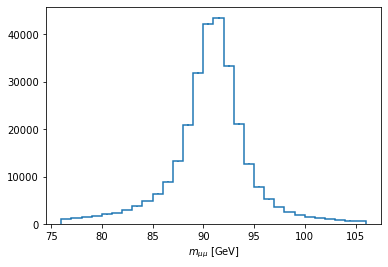

In [35]:
rlt_mc['2018']['zmass']['data']['nominal'].hist.plot()

In [25]:
# hdata=Hist(rlt_data['2018']['mass'].to_boost())
hmc=Hist(rlt_mc['2018']['mass'].to_boost())
htest=hmc['DYJetsToLL_M-105To160',:]

In [31]:
a=hmc.axes[0]
for i in range(len(a)):
    print(a[i])

DYJetsToLL_M-105To160
DYJetsToLL_M-105To160_CMS_JER_2018_down
DYJetsToLL_M-105To160_CMS_JER_2018_up
DYJetsToLL_M-105To160_CMS_JES_Absolute_2018_down
DYJetsToLL_M-105To160_CMS_JES_Absolute_2018_up
DYJetsToLL_M-105To160_CMS_JES_Absolute_down
DYJetsToLL_M-105To160_CMS_JES_Absolute_up
DYJetsToLL_M-105To160_CMS_JES_BBEC1_2018_down
DYJetsToLL_M-105To160_CMS_JES_BBEC1_2018_up
DYJetsToLL_M-105To160_CMS_JES_BBEC1_down
DYJetsToLL_M-105To160_CMS_JES_BBEC1_up
DYJetsToLL_M-105To160_CMS_JES_EC2_2018_down
DYJetsToLL_M-105To160_CMS_JES_EC2_2018_up
DYJetsToLL_M-105To160_CMS_JES_EC2_down
DYJetsToLL_M-105To160_CMS_JES_EC2_up
DYJetsToLL_M-105To160_CMS_JES_FlavorQCD_down
DYJetsToLL_M-105To160_CMS_JES_FlavorQCD_up
DYJetsToLL_M-105To160_CMS_JES_HF_2018_down
DYJetsToLL_M-105To160_CMS_JES_HF_2018_up
DYJetsToLL_M-105To160_CMS_JES_HF_down
DYJetsToLL_M-105To160_CMS_JES_HF_up
DYJetsToLL_M-105To160_CMS_JES_RelativeBal_down
DYJetsToLL_M-105To160_CMS_JES_RelativeBal_up
DYJetsToLL_M-105To160_CMS_JES_RelativeSample_201

In [26]:
np.max(htest.values())

508.1397542208433

In [5]:
group = {}
group['data'] = {
    'label': 'Data',
    'color': 'black',
    'scale': 1.0,
    'subsample': {
        '2018': {
            'SingleMuon_Run2018A': 1.0,
            'SingleMuon_Run2018B': 1.0,
            'SingleMuon_Run2018C': 1.0,
            'SingleMuon_Run2018D': 1.0,
        },
    },
    'data': True,
}

group['DY'] = {
    'label': 'DY',
    'color': 'yellow',
    'scale': 1.0,
    'subsample': {
        '2018': {
            'DYJetsToLL_M-50_ext1': 1.0,
        },
    },
}

group['VBF_Z'] = {
    'label': 'VBF Z',
    'color': 'purple',
    'scale': 1.0,
    'subsample': {
        '2018': {
            'EWK_LLJJ_MLL-50_MJJ-120': 1.0,
            'EWK_LLJJ_MLL_105-160': 1.0,
        },
    },
}

group['top'] = {
    'label': 'Top',
    'color': 'cyan',
    'scale': 1.0,
    'subsample': {
        '2018': {
            'ST_s-channel_antitop': 1.0,
            'ST_s-channel_top': 1.0,
            'ST_t-channel_antitop': 1.0,
            'ST_t-channel_top': 1.0,
            'ST_tW_antitop': 1.0,
            'ST_tW_top': 1.0,
            'TTTJ': 1.0,
            'TTTT_ext1': 1.0,
            'TTTW': 1.0,
            'TTTo2L2Nu': 1.0,
            'TTToSemiLeptonic_ext1': 1.0,
            'TTWJetsToLNu': 1.0,
            'TTWW_ext1': 1.0,
            'TTZToLLNuNu_M-10': 1.0,
        },
    },
}

group['other'] = {
    'label': 'Other',
    'color': 'green',
    'scale': 1.0,
    'subsample': {
        '2018': {
            'GluGluToContinToZZTo2e2mu': 1.0,
            'GluGluToContinToZZTo2e2tau': 1.0,
            'GluGluToContinToZZTo2mu2nu': 1.0,
            'GluGluToContinToZZTo2mu2tau': 1.0,
            'GluGluToContinToZZTo4mu': 1.0,
            'GluGluToContinToZZTo4tau': 1.0,
            'WWTo2L2Nu': 1.0,
            'WZTo2L2Q': 1.0,
            'WZTo3LNu_MG_ext1': 1.0,
            'ZZTo2L2Nu': 1.0,
            'ZZTo2L2Q': 1.0,
            'ZZTo4L_ext1': 1.0,
            'WWW': 1.0,
            'WWZ': 1.0,
            'WZZ': 1.0,
            'ZZZ': 1.0,
            'tZq_ll': 1.0,
        },
    },
}

# signal
group['ggH'] = {
    'label': r'ggF H($\mu\mu$)',
    'color': 'red',
    'scale': 1.0, # stack scale
    'subsample': {
        '2018': {
            'GluGluHToMuMu_M125': 1.0,
        },
    },
    'signal': True,
    'plot_shape': 2, # True: only shape no stacked plot, False: both shape and stacked plot
    'shape_norm': 20, # shape normalization will plot the shape scaled by this factor without stacking 
}

group['VBF_H'] = {
    'label': r'VBF H($\mu\mu$)',
    'color': 'blue',
    'scale': 1.0, # stack scale
    'subsample': {
        '2018': {
            'VBFHToMuMu_M-125_withDipoleRecoil': 1.0,
        },
    },
    'signal': True,
    'plot_shape': 2, # True: only shape no stacked plot, False: both shape and stacked plot
    'shape_norm': 20, # shape normalization will plot the shape scaled by this factor without stacking 
}


In [11]:
def merge_hist(hists,subsamples):
    htmp = 0
    for isub in subsamples:
        htmp += hists[isub,:]*subsamples[isub]
    return htmp

In [12]:
import copy

hname_dict = get_hist_key(rlt_mc)
year_dict = get_year_key(group)

hist_dict = {} # histogram dictionary: hist_dict[year][hist_name][group_name]
for iyear in year_dict:
    hist_dict[iyear] = {}
    for ivar in hname_dict:
        hist_dict[iyear][ivar] = {}
        for igp in group:
            subsample = group[igp]['subsample']
            group_cfg = copy.deepcopy(group[igp])
            group_cfg.pop('subsample')
            if 'data' in igp:
                group_cfg['hist']=merge_hist(Hist(rlt_data[iyear][ivar].to_boost()),subsample[iyear])
            else:
                group_cfg['hist']=merge_hist(Hist(rlt_mc[iyear][ivar].to_boost()),subsample[iyear])

            hist_dict[iyear][ivar][igp] = super_hist(**group_cfg)
# for igp in group:
#     subsamples = group[igp].pop('subsample')
#     for iyear in subsamples.keys():
        
#             hist_dict[iyear][ivar] = {}
#             if 'data' in igp:
#                 group[igp]['hist']=merge_hist(Hist(rlt_data[iyear][ivar].to_boost()),subsamples[iyear])
#             else:
#                 group[igp]['hist']=merge_hist(Hist(rlt_mc[iyear][ivar].to_boost()),subsamples[iyear])
#             hist_dict[iyear][ivar][igp] = 

In [32]:
hist_dict['2018']['mass']['DY'].hist.sum().value

303098.7244987488

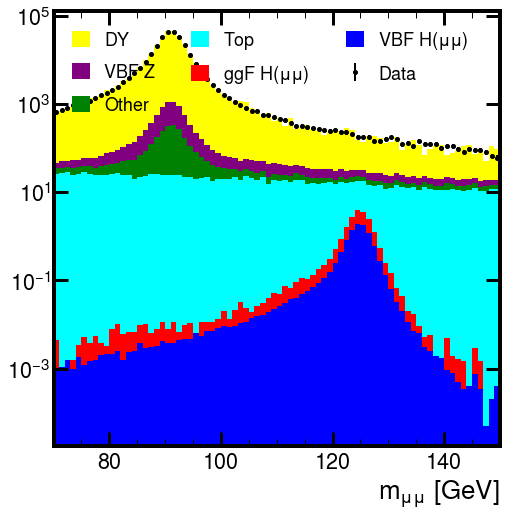

In [114]:
import mplhep as hep
# hep.cms.style.CMS["xtick.major.width"]=3
# hep.cms.style.CMS["ytick.major.width"]=3
# hep.cms.style.CMS["xtick.minor.width"]=1
# # hep.cms.style.CMS["xtick.minor.visible"]=True
# # hep.cms.style.CMS["ytick.minor.visible"]=True
# hep.cms.style.CMS["ytick.minor.width"]=1
# hep.cms.style.CMS["xtick.major.size"]=14
# hep.cms.style.CMS["xtick.minor.size"]=7
# hep.cms.style.CMS["ytick.major.size"]=14
# hep.cms.style.CMS["ytick.minor.size"]=7
hep.cms.style.CMS["legend.handlelength"]=0.8
hep.cms.style.CMS["legend.handleheight"]=0.8
# hep.cms.style.CMS["legend.fontsize"]=18
# hep.cms.style.CMS["legend.labelspacing"]=0.8
# hep.cms.style.CMS["axes.linewidth"]=2
#plt.style.use(hep.style.CMS)
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(figsize=(8, 8))
for iyear in hist_dict:
    for ivar in ['mass']:
        hist_list = []
        label_list = []
        color_list = []
        for igp in hist_dict[iyear][ivar]:
            if hist_dict[iyear][ivar][igp].data:
                continue
            hist_list.append(hist_dict[iyear][ivar][igp].hist)
            label_list.append(hist_dict[iyear][ivar][igp].label)
            color_list.append(hist_dict[iyear][ivar][igp].color)
        zipped = zip(hist_list, label_list, color_list)
        resort_zipped = sorted(zipped, key=lambda x: x[0].sum().value, reverse=False)
        hist_tuple, label_tuple, color_tuple = zip(*resort_zipped)
        hep.histplot(list(hist_tuple), histtype='fill', stack=True, label=list(label_tuple), color=list(color_tuple), ax=ax)
        hep.histplot(hist_dict[iyear][ivar]['data'].hist, histtype='errorbar', stack=False, label=hist_dict[iyear][ivar]['data'].label, color=hist_dict[iyear][ivar]['data'].color, ax=ax, marker='o', markersize=4,elinewidth=2)

# ax.legend(leg_handles_new,leg_labels_new,loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
ax.set_xlim([70,150])
# ax.set_ylim([70,150])
plt.yscale('log')
plt.legend(ncol=3,loc='upper left')
plt.show()

In [98]:
a=sorted(zipped, key=lambda x: x[0].sum().value, reverse=False)

In [100]:
b,c,d = zip(*a)

In [101]:
b

(Hist(Regular(80, 70, 150, name='mass', label='$m_{\\mu\\mu}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=9.79584, variance=0.000488982) (WeightedSum(value=9.8142, variance=0.000489899) with flow),
 Hist(Regular(80, 70, 150, name='mass', label='$m_{\\mu\\mu}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=9.91776, variance=0.0158767) (WeightedSum(value=9.94069, variance=0.0159114) with flow),
 Hist(Regular(80, 70, 150, name='mass', label='$m_{\\mu\\mu}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=1460.49, variance=210.478) (WeightedSum(value=3189.4, variance=456.582) with flow),
 Hist(Regular(80, 70, 150, name='mass', label='$m_{\\mu\\mu}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=2334.01, variance=107.106) (WeightedSum(value=2857.54, variance=146.073) with flow),
 Hist(Regular(80, 70, 150, name='mass', label='$m_{\\mu\\mu}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=5733.99, variance=114.924) (WeightedSum(value=6092.88, variance=122.02) with flo

In [21]:
hist={
    'hist': [3,1,9,0],
    'label': ['a','b','c','d'],
}

In [28]:
sorted(hist.items(), key=lambda x: x[0]['hist'], reverse=True)
# hist.items()

TypeError: string indices must be integers

In [6]:
class super_hist(object):
    def __init__(self, **kwargs):
        # data=False, signal=False, title='bkg', color='red', scale=1.0, plot_shape=0, shape_norm=1.0
        self.data = kwargs.get('data', False)
        self.signal = kwargs.get('signal', False)
        self.hist = kwargs.get('hist', None)
        self.label = kwargs.get('label', 'bkg')
        self.color = kwargs.get('color', 'red')
        self.scale = kwargs.get('scale', 1.0)
        self.plot_shape = kwargs.get('plot_shape', 0) # plot_shape=0: stack only, plot_shape=1: shape only, plot_shape=2: shape and stack
        self.shape_norm = kwargs.get('shape_norm', 1.0)

    def set_data(self, data):
        self.data = data
    def set_signal(self, signal):
        self.signal = signal
    def set_hist(self, hist):
        self.hist = hist
    def set_label(self, label):
        self.label = label
    def set_color(self, color):
        self.color = color
    def set_scale(self, scale):
        self.scale = scale
    def set_plot_shape(self, plot_shape):
        self.plot_shape = plot_shape
    def set_shape_norm(self, shape_norm):
        self.shape_norm = shape_norm


In [7]:
def get_hist_key(result, exclude_list=['ntot', 'npos', 'nneg', 'neff', 'npass']):
    """
    remove keys in exclude_list, the kept keys should be histogram names
    """
    key_list = []
    for iyear in result:
        key_list = list(result[iyear].keys())
        break
    for ikey in exclude_list:
        key_list.remove(ikey)
    return key_list

def get_year_key(group):
    """
    get the exist year
    """
    key_list = []
    for ikey in group:
        key_list += list(group[ikey]['subsample'].keys())
        break
    # check if the years in key_list are in all the group
    # if not, remove the year
    for ikey in group:
        for iyear in key_list:
            if iyear not in group[ikey]['subsample'].keys():
                key_list.remove(iyear)
    return key_list

def get_gp_key(group, sample_type):
    """
    sample_type => 0: data, 1: signal, 2: background
    """
    key_list = []
    if sample_type == 0:
        for ikey in group:
            if 'data' in group[ikey]:
                if group[ikey]['data']:
                    key_list.append(ikey)
    elif sample_type == 1:
        for ikey in group:
            if 'signal' in group[ikey]:
                key_list.append(ikey)
    elif sample_type == 2:
        for ikey in group:
            if not 'data' in group[ikey] and not 'signal' in group[ikey]:
                key_list.append(ikey)
    else:
        raise ValueError("sample_type must be 0, 1, or 2")
    
    return key_list

In [48]:
the_hist = Hist(data['2018']['mass'].to_boost())
the_hist['SingleMuon_Run2018A',:]

Hist(Regular(80, 70, 150, name='mass', label='$m_{\\mu\\mu}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=95566, variance=95566) (WeightedSum(value=115308, variance=115308) with flow)

In [25]:
data['mass']

<Hist (dataset,mass) instance at 0x7f3be7c501c0>

In [35]:
a.remove('nrx')

ValueError: list.remove(x): x not in list

In [13]:
class hist_info(object):
    def __init__(self, name, color, scale, signal, shape_only, shape_norm):
        self.title = name
        self.color = color
        self.scale = scale
        self.signal = signal
        self.shape_only = shape_only
        self.shape_norm = shape_norm


{'data': {'name': 'data',
  'color': 'black',
  'scale': 1.0,
  'subsample': {2018: {'SingleMuon_Run2018A': 1.0,
    'SingleMuon_Run2018B': 1.0,
    'SingleMuon_Run2018C': 1.0,
    'SingleMuon_Run2018D': 1.0}},
  'data': True},
 'DY': {'name': 'DY',
  'color': 'yellow',
  'scale': 1.0,
  'subsample': {2018: {'DYJetsToLL_M-50_ext1': 1.0}}},
 'VBF_Z': {'name': 'VBF Z',
  'color': 'purple',
  'scale': 1.0,
  'subsample': {2018: {'EWK_LLJJ_MLL-50_MJJ-120': 1.0,
    'EWK_LLJJ_MLL_105-160': 1.0}}},
 'top': {'name': 'Top',
  'color': 'kyan',
  'scale': 1.0,
  'subsample': {2018: {'ST_s-channel_antitop': 1.0,
    'ST_s-channel_top': 1.0,
    'ST_t-channel_antitop': 1.0,
    'ST_t-channel_top': 1.0,
    'ST_tW_antitop': 1.0,
    'ST_tW_top': 1.0,
    'TTTJ': 1.0,
    'TTTT_ext1': 1.0,
    'TTTW': 1.0,
    'TTTo2L2Nu': 1.0,
    'TTToSemiLeptonic_ext1': 1.0,
    'TTWJetsToLNu': 1.0,
    'TTWW_ext1': 1.0,
    'TTZToLLNuNu_M-10': 1.0}}},
 'other': {'name': 'Other',
  'color': 'green',
  'scale': 1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


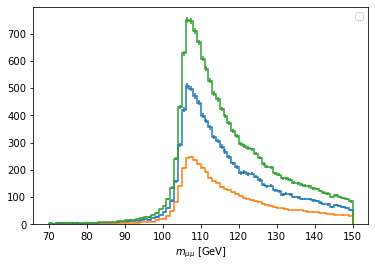

In [34]:
a=0
hmc['DYJetsToLL_M-105To160',:].plot()
a+=hmc['DYJetsToLL_M-105To160',:]
hmc['DYJetsToLL_M-105To160_VBFFilter_ext1',:].plot()
b=hmc['DYJetsToLL_M-105To160',:]+hmc['DYJetsToLL_M-105To160_VBFFilter_ext1',:]
a+=hmc['DYJetsToLL_M-105To160_VBFFilter_ext1',:]
a.plot()
# b.plot()
# plt.logY()
plt.legend()
plt.show()

AssertionError: 

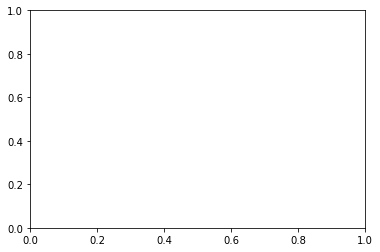

<Figure size 720x576 with 0 Axes>

In [19]:
# plot1d
fig, ax = plt.subplots(figsize=(6, 4))

fig = plt.figure(figsize=(10, 8))
main_ax_artists, sublot_ax_arists = hdata.project("mass").plot_ratio(
    hmc[{'dataset': slice(['DYJetsToLL_M-50_ext1', 'EWK_LLJJ_MLL-50_MJJ-120', 'GluGluHToMuMu_M125', 'GluGluToContinToZZTo2e2mu', 'GluGluToContinToZZTo2e2tau', 'GluGluToContinToZZTo2mu2nu', 'GluGluToContinToZZTo2mu2tau', 'GluGluToContinToZZTo4mu', 'GluGluToContinToZZTo4tau', 'ST_s-channel_antitop', 'ST_s-channel_top', 'ST_t-channel_antitop', 'ST_t-channel_top', 'ST_tW_antitop', 'ST_tW_top', 'TTTJ', 'TTTT', 'TTTT_ext1', 'TTTW', 'TTTo2L2Nu', 'TTToSemiLeptonic_ext1', 'TTWJetsToLNu', 'TTWW_ext1', 'TTZToLLNuNu_M-10','VBFHToMuMu_M-125_withDipoleRecoil', 'WWTo2L2Nu', 'WWW', 'WWZ', 'WZTo2L2Q', 'WZTo3LNu_MG_ext1', 'WZZ', 'ZZTo2L2Nu', 'ZZTo2L2Q', 'ZZTo4L_ext1', 'ZZZ', 'tZq_ll'])}].project("mass"),
    rp_ylabel=r"Ratio",
    rp_num_label="hist1",
    rp_denom_label="hist2",
    rp_uncert_draw_type="bar",  # line or bar
)

hdata.project("mass").plot1d(ax=ax, ls="--", color="teal", lw=3)
plt.show()